In [5]:
pip install pandas numpy scikit-learn xgboost matplotlib seaborn joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Available datasets: heart, diabetes, breast_cancer

=== HEART DATASET ===
Loaded heart dataset with shape (1025, 14), target = target


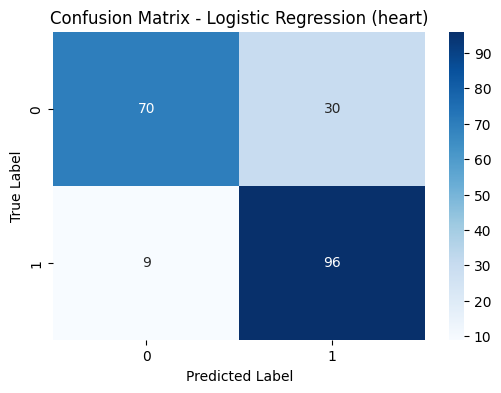

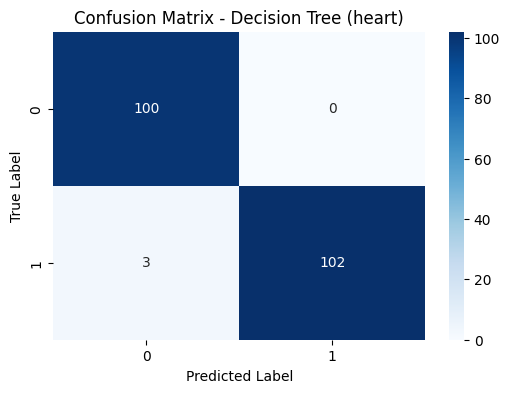

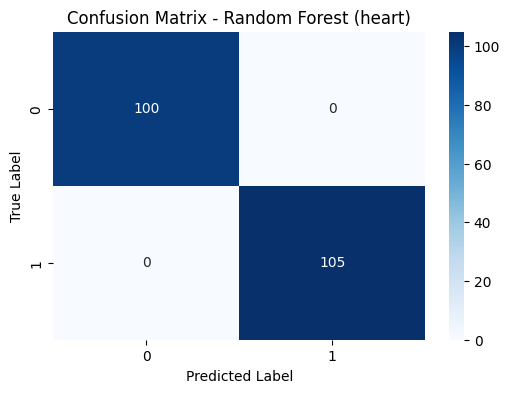

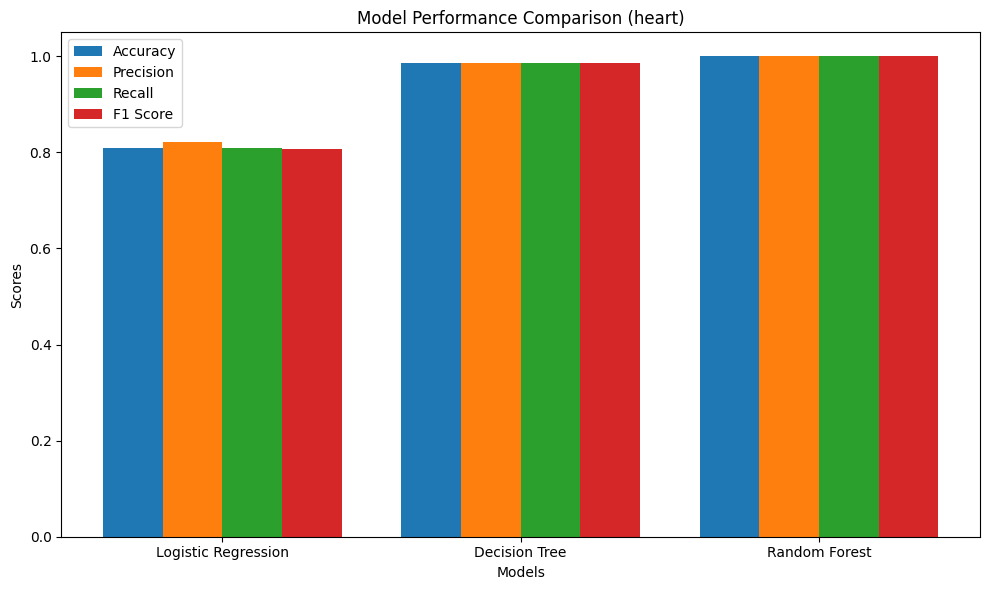


Logistic Regression:
Accuracy: 0.8097560975609757
Precision: 0.8224760728619943
Recall: 0.8097560975609757
F1 Score: 0.807243989148881
Confusion Matrix: [[70, 30], [9, 96]]

Decision Tree:
Accuracy: 0.9853658536585366
Precision: 0.985792090930618
Recall: 0.9853658536585366
F1 Score: 0.9853679432060973
Confusion Matrix: [[100, 0], [3, 102]]

Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix: [[100, 0], [0, 105]]

=== DIABETES DATASET ===
Loaded diabetes dataset with shape (200, 9), target = Outcome


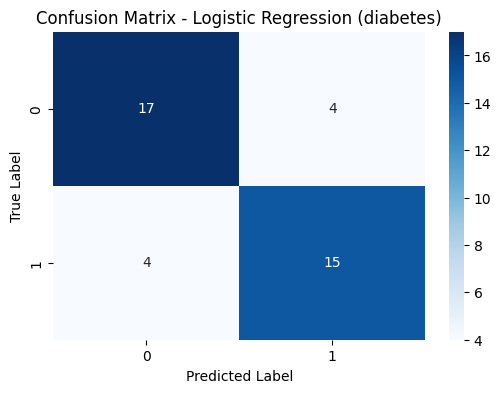

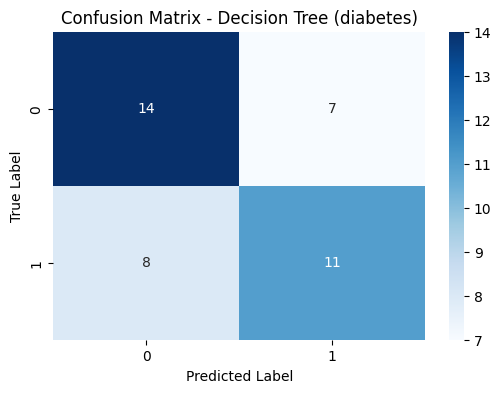

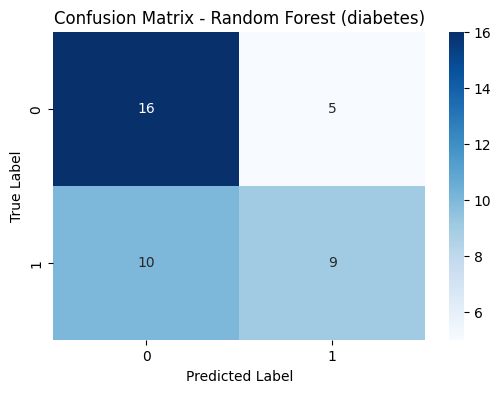

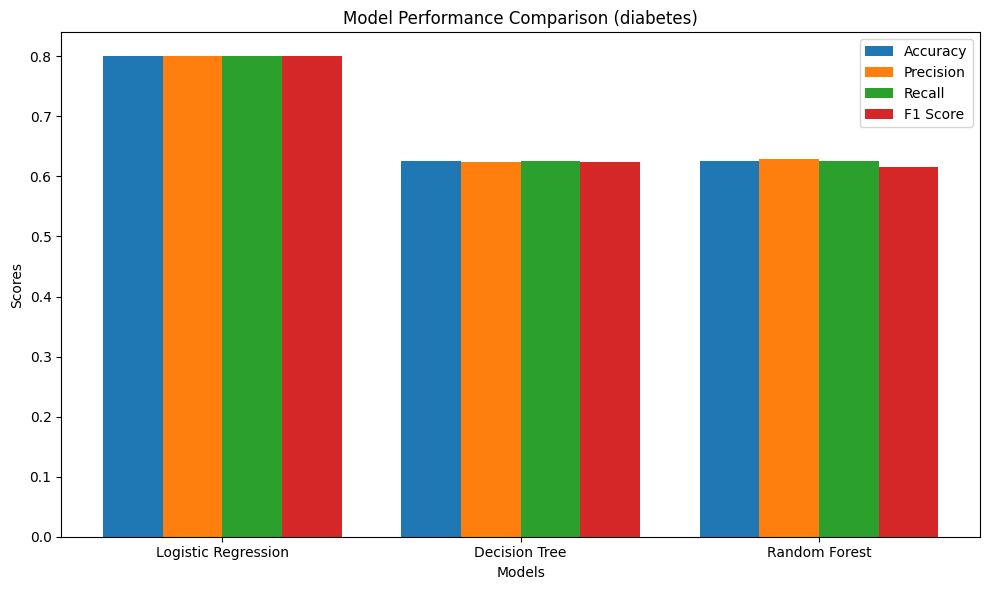


Logistic Regression:
Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8
Confusion Matrix: [[17, 4], [4, 15]]

Decision Tree:
Accuracy: 0.625
Precision: 0.6243686868686869
Recall: 0.625
F1 Score: 0.6242928975487116
Confusion Matrix: [[14, 7], [8, 11]]

Random Forest:
Accuracy: 0.625
Precision: 0.6284340659340659
Recall: 0.625
F1 Score: 0.6165377176015474
Confusion Matrix: [[16, 5], [10, 9]]

=== BREAST_CANCER DATASET ===
Loaded breast_cancer dataset with shape (569, 31), target = diagnosis


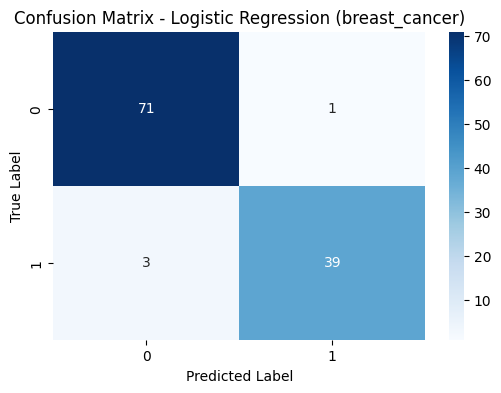

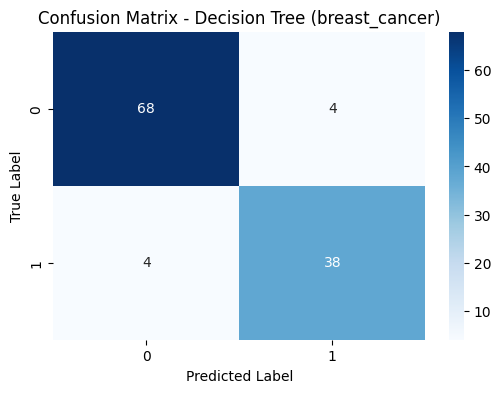

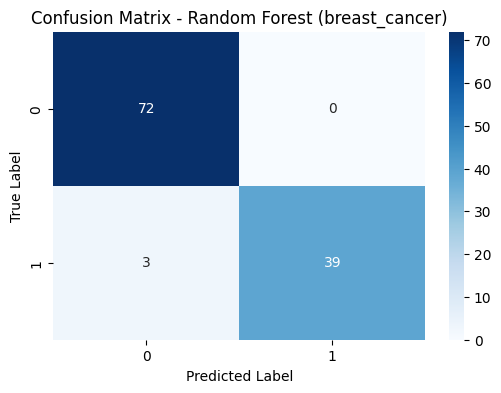

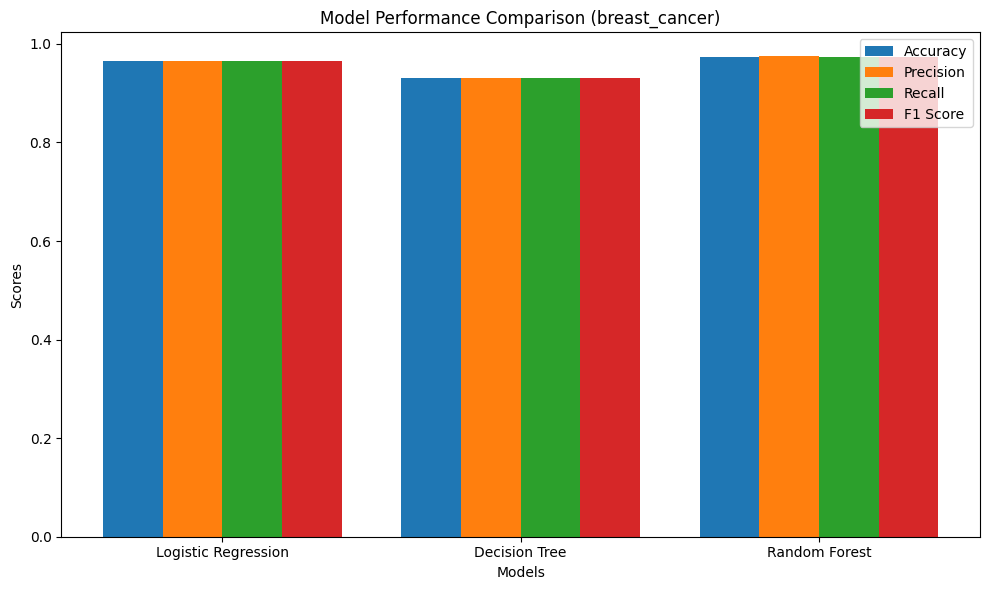


Logistic Regression:
Accuracy: 0.9649122807017544
Precision: 0.9651849217638692
Recall: 0.9649122807017544
F1 Score: 0.9647247085304307
Confusion Matrix: [[71, 1], [3, 39]]

Decision Tree:
Accuracy: 0.9298245614035088
Precision: 0.9298245614035088
Recall: 0.9298245614035088
F1 Score: 0.9298245614035088
Confusion Matrix: [[68, 4], [4, 38]]

Random Forest:
Accuracy: 0.9736842105263158
Precision: 0.9747368421052632
Recall: 0.9736842105263158
F1 Score: 0.9734654095556351
Confusion Matrix: [[72, 0], [3, 39]]


In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

BASE_DIR = r"c:\Users\bukka\Downloads"
DATA_PATHS = {
    "heart": os.path.join(BASE_DIR, "dataset 1", "heart.csv"),
    "diabetes": os.path.join(BASE_DIR, "dataset 2", "diabetes_dataset.csv"),
    "breast_cancer": os.path.join(BASE_DIR, "dataset 3", "data.csv"),
}

def load_data(dataset_name):
    try:
        data = pd.read_csv(DATA_PATHS[dataset_name])

        if dataset_name == "breast_cancer" and 'id' in data.columns:
            data = data.drop(columns=['id'])

        data = data.dropna()

        categorical_columns = data.select_dtypes(include=['object', 'category']).columns

        label_encoders = {}
        for col in categorical_columns:
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])
            label_encoders[col] = le

        if dataset_name == "heart":
            if "target" in data.columns:
                target_column = "target"
            elif "output" in data.columns:
                target_column = "output"
            else:
                raise KeyError("No target column found in heart dataset")

        elif dataset_name == "diabetes":
            if "Outcome" in data.columns:
                target_column = "Outcome"
            else:
                raise KeyError("No target column found in diabetes dataset")

        elif dataset_name == "breast_cancer":
            if "diagnosis" in data.columns:
                target_column = "diagnosis"
                if data[target_column].dtype not in ['int64', 'float64']:
                    data[target_column] = data[target_column].map({"M": 1, "B": 0})
            elif "target" in data.columns:
                target_column = "target"
            else:
                raise KeyError("No target column found in breast_cancer dataset")

        else:
            raise ValueError(f"Unknown dataset: {dataset_name}")

        return data, target_column

    except Exception as e:
        raise Exception(f"Error loading {dataset_name} dataset: {str(e)}")

def train_and_evaluate(data, target_column, dataset_name):
    X = data.drop(columns=[target_column])
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
    }

    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        results[name] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred, average="weighted", zero_division=0),
            "Recall": recall_score(y_test, y_pred, average="weighted", zero_division=0),
            "F1 Score": f1_score(y_test, y_pred, average="weighted", zero_division=0),
            "Confusion Matrix": confusion_matrix(y_test, y_pred).tolist(),
        }

        plt.figure(figsize=(6, 4))
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {name} ({dataset_name})')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()

    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    model_names = list(results.keys())
    metric_values = {metric: [results[model][metric] for model in model_names] for metric in metrics}

    plt.figure(figsize=(10, 6))
    x = np.arange(len(model_names))
    width = 0.2

    for i, metric in enumerate(metrics):
        plt.bar(x + i*width, metric_values[metric], width, label=metric)

    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title(f'Model Performance Comparison ({dataset_name})')
    plt.xticks(x + width*1.5, model_names)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return results

def main():
    datasets = ["heart", "diabetes", "breast_cancer"]
    print("Available datasets:", ", ".join(datasets))
    dataset_choice = input("Enter the dataset to process (heart, diabetes, breast_cancer, or all): ").lower()

    if dataset_choice == "all":
        datasets_to_process = datasets
    elif dataset_choice in datasets:
        datasets_to_process = [dataset_choice]
    else:
        print("Invalid dataset choice. Exiting.")
        return

    for d in datasets_to_process:
        print(f"\n=== {d.upper()} DATASET ===")
        try:
            data, target_column = load_data(d)
            print(f"Loaded {d} dataset with shape {data.shape}, target = {target_column}")

            results = train_and_evaluate(data, target_column, d)

            for model, metrics in results.items():
                print(f"\n{model}:")
                for metric, value in metrics.items():
                    print(f"{metric}: {value}")
        except Exception as e:
            print(f"Error processing {d} dataset: {str(e)}")

if __name__ == "__main__":
    main()